In [1]:
import numpy as np
import nibabel as nib
import itk
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [2]:
image_path = '/Users/zhujiayuan/Downloads/Task04_Hippocampus/imagesTr/hippocampus_001.nii.gz'
image_obj = nib.load(image_path)
print(f'Type of the image {type(image_obj)}.')

Type of the image <class 'nibabel.nifti1.Nifti1Image'>.


In [3]:
# Turn into numpy array
#array = np.array(image.dataobj)
image_data = image_obj.get_fdata()
type(image_data)

numpy.ndarray

In [6]:
image_data.shape

(35, 51, 35)

In [7]:
# Get the image shape and print it out
height, width, depth= image_data.shape
print(f'The image object has the following dimensions:\nheight={height}\nwidth={width}\ndepth={depth}')

The image object has the following dimensions:
height=35
width=51
depth=35


### Visualize

Plotting layer Layer 17 of image


<function matplotlib.pyplot.show(close=None, block=None)>

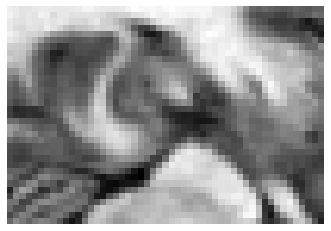

In [13]:
# Select random layer number
maxval = 35
i = np.random.randint(0, maxval)

print(f'Plotting layer Layer {i} of image')
plt.imshow(image_data[:, :, i], cmap = 'gray')
plt.axis('off')
plt.show

In [14]:
# define a function to visualize the data
def explore_3d_image(layer):
    plt.figure(figsize=(10,15))
    plt.imshow(image_data[:, :, layer], cmap = 'gray')
    plt.title('Explore Layers of Brain MRI', family = 'Arial', fontsize=20)
    plt.axis('off')
    return layer

# run the ipywidgets interact() function to explore data
interact(explore_3d_image, layer=(0,image_data.shape[2]-1))

interactive(children=(IntSlider(value=17, description='layer', max=34), Output()), _dom_classes=('widget-inter…

<function __main__.explore_3d_image(layer)>

In [18]:
label_path = '/Users/zhujiayuan/Downloads/Task04_Hippocampus/labelsTr/hippocampus_001.nii.gz'
label_obj = nib.load(label_path)
type(label_obj)

nibabel.nifti1.Nifti1Image

In [19]:
label_array = label_obj.get_fdata()
type(label_array)

numpy.ndarray

In [20]:
height,width,depth=label_array.shape
print(f'The label object has the following dimensions:\nheight={height}\nwidth={width}\ndepth={depth}')

The label object has the following dimensions:
height=35
width=51
depth=35


In [26]:
print(f'With the unique values: {np.unique(label_array)}')

print('''\nCorresponding to the following label categories
0: background,
1: Anterior,
2: Posterior
''')

With the unique values: [0. 1. 2.]

Corresponding to the following label categories
0: background,
1: Anterior,
2: Posterior



### visualize the data for specific labels

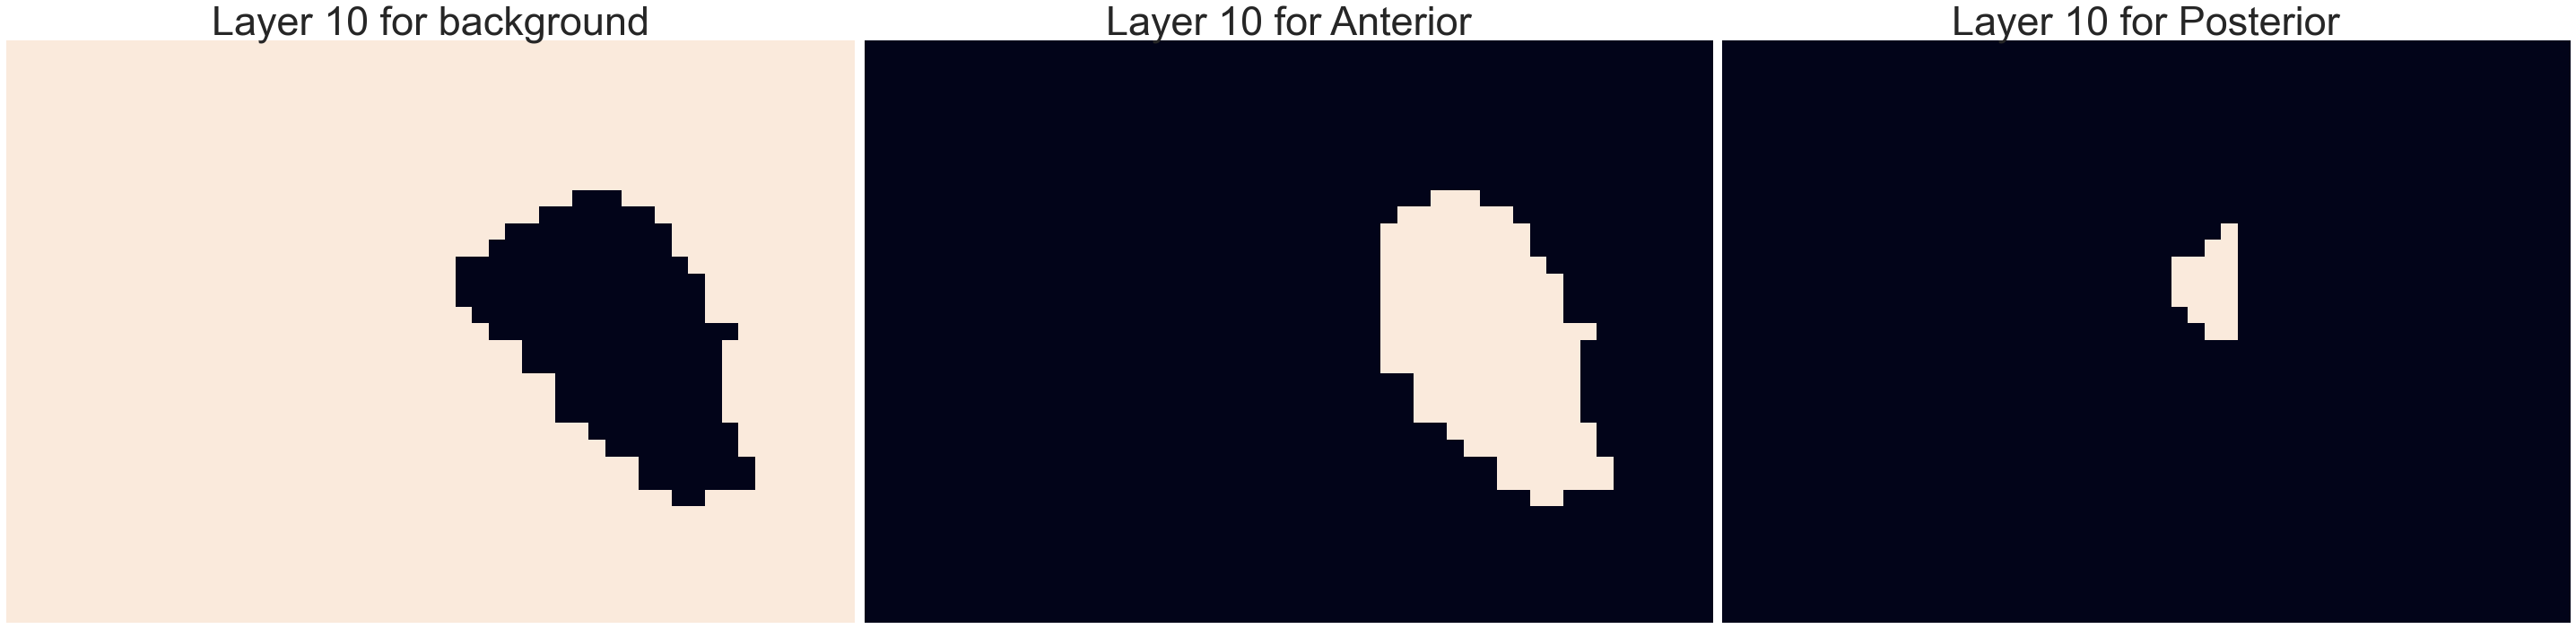

In [73]:
# define a single layer for plotting
layer = 10

# define a dictionary of class labels
classes_dict = {
    'background': 0,
    'Anterior':1,
    'Posterior': 2
}

# set up for plotting
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(40,25))
for i in range(3):
    img_label_str = list(classes_dict.keys())[i]
    img = label_array[:, :, layer]
    mask = np.where(img==classes_dict[img_label_str], 255, 0)
    ax[i].imshow(mask)
    ax[i].set_title(f'Layer {layer} for {img_label_str}', fontsize=45, family = 'Arial')
    ax[i].axis('off')
plt.tight_layout()

### interactive visualization across layers

In [78]:
# create button values
select_class = ToggleButtons(
    options = ['background', 'Anterior', 'Posterior'],
    description = 'Select class',
    disabled = False,
    button_style = 'info'
)

# create layer slider
select_layer = IntSlider(min=0, max = 34, description = 'Select layer', continuous_update = False)

# define a function for plotting images
def plot_image(seg_class, layer):
    print(f'Plotting {layer} Layer, Label: {seg_class}')
    img_label = classes_dict[seg_class]
    mask = np.where(label_array[:, :, layer]==img_label, 255, 0)
    plt.figure(figsize=(6,9))
    plt.imshow(mask, cmap='gray')
    plt.axis('off')
    
# use the interactive() tool to create a visualization
interactive(plot_image, seg_class = select_class, layer = select_layer)


interactive(children=(ToggleButtons(button_style='info', description='Select class', options=('background', 'A…

## import data

In [257]:
import glob
import torchio as tio
from torchvision import transforms 
from torch.utils.data import DataLoader

In [258]:
images = glob.glob('/Users/zhujiayuan/Downloads/Task04_Hippocampus/imagesTr' + "/*.nii.gz")
labels = glob.glob('/Users/zhujiayuan/Downloads/Task04_Hippocampus/labelsTr' + "/*.nii.gz")

In [275]:
nib.load(images[0]).get_fdata().shape

(36, 57, 37)

### find size distribution

In [291]:
width_list_images = []
height_list_images = []
depth_list_images = []
width_list_labels = []
height_list_labels = []
depth_list_labels = []

flattern_data = np.array([])

for i in range(len(images)):
    image = nib.load(images[i]).get_fdata().shape
    label = nib.load(labels[i]).get_fdata().shape
    
    width_list_images.append(image[0])
    height_list_images.append(image[1])
    depth_list_images.append(image[2])
    
    width_list_labels.append(label[0])
    height_list_labels.append(label[1])
    depth_list_labels.append(label[2])
    
    flattern_data = np.append(flattern_data, nib.load(images[i]).get_fdata().flatten())

In [292]:
resize_shape = (max(width_list_images), max(height_list_images), max(depth_list_images))
resize_shape

(43, 59, 47)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30'),
  Text(0, 35.0, '35')])

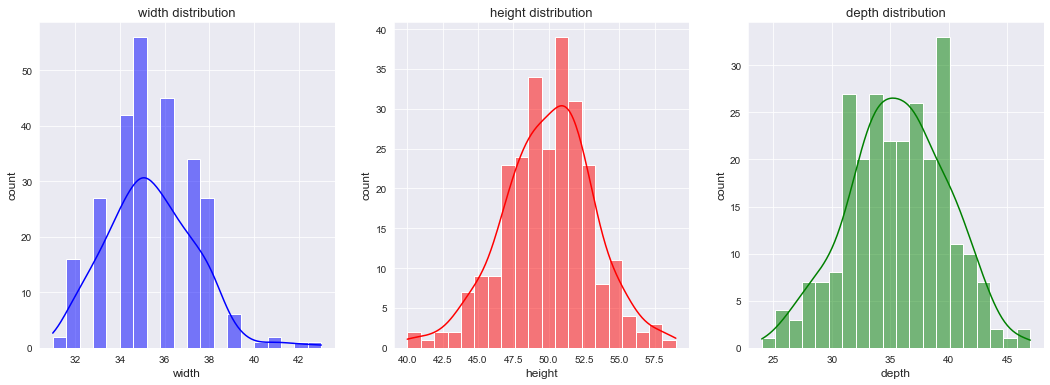

In [293]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(18,6))

plt.subplot(1,3,1)
# training set
fig = sns.histplot(width_list_images, color = 'b', kde = True, bins = 20) 

plt.title('width distribution', fontsize = 13)
plt.xlabel('width', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(1,3,2)
fig = sns.histplot(height_list_images, color = 'r', kde = True, bins = 20) 

plt.title('height distribution', fontsize = 13)
plt.xlabel('height', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(1,3,3)
fig = sns.histplot(depth_list_images, color = 'g', kde = True, bins = 20) 

plt.title('depth distribution', fontsize = 13)
plt.xlabel('depth', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.savefig('shape distribution', dpi = 300, bbox_inches='tight', facecolor='w')

### find data distribution

(array([0.0e+00, 2.0e+07, 4.0e+07, 6.0e+07, 8.0e+07, 1.0e+08, 1.2e+08,
        1.4e+08, 1.6e+08, 1.8e+08]),
 [Text(0, 0.0, '0.0'),
  Text(0, 20000000.0, '0.2'),
  Text(0, 40000000.0, '0.4'),
  Text(0, 60000000.0, '0.6'),
  Text(0, 80000000.0, '0.8'),
  Text(0, 100000000.0, '1.0'),
  Text(0, 120000000.0, '1.2'),
  Text(0, 140000000.0, '1.4'),
  Text(0, 160000000.0, '1.6'),
  Text(0, 180000000.0, '1.8')])

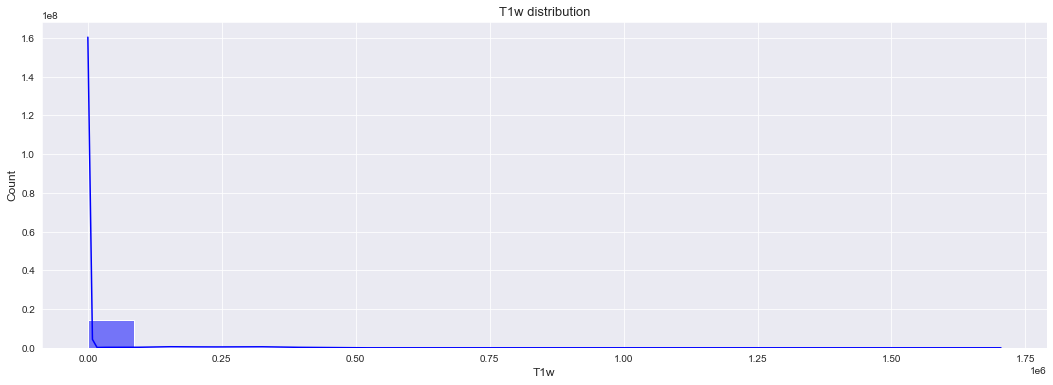

In [770]:
plt.figure(figsize=(18,6))

fig = sns.histplot(flattern_data, color = 'b', kde = True, bins = 20) 

plt.title('T1w distribution', fontsize = 13)
plt.xlabel('T1w', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

In [296]:
min(flattern_data)

0.0

In [297]:
max(flattern_data)

1704295.25

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000'),
  Text(0, 6000.0, '6000'),
  Text(0, 7000.0, '7000')])

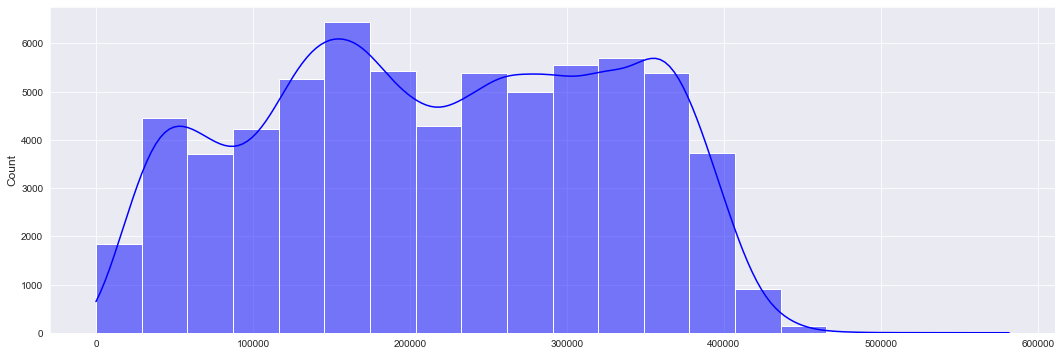

In [303]:
a = nib.load(images[2]).get_fdata().flatten()

plt.figure(figsize=(18,6))

fig = sns.histplot(a, color = 'b', kde = True, bins = 20) 

plt.title('', fontsize = 13)
plt.xlabel('', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

## train lable counts

In [621]:
labels = glob.glob('/Users/zhujiayuan/Downloads/Task04_Hippocampus/train/labels' + "/*.nii.gz")
a = nib.load(labels[0]).get_fdata().flatten()
a

array([0., 0., 0., ..., 0., 0., 0.])

In [622]:
count_dict = {0: 0, 1: 0, 2:0}
for i in range(len(labels)):
    label = nib.load(labels[i]).get_fdata().flatten()
    count_dict[0] += np.count_nonzero(label == 0)
    count_dict[1] += np.count_nonzero(label == 1)
    count_dict[2] += np.count_nonzero(label == 2)

In [623]:
count_dict

{0: 24348059, 1: 359957, 2: 332174}

In [625]:
359957/332174

1.0836398995707068

In [ ]:
67:1.08:1

In [ ]:
1:5:10

In [ ]:
1:100:100

### resize image with tio.CropOrPad

In [553]:
import torch
import os

In [485]:
def preprocessing(root, resize_shape = (43, 59, 47)):
    # image and label path
    image_path = os.path.join(root, 'imagesTr')
    label_path = os.path.join(root, 'labelsTr')
    images = sorted(glob.glob(image_path + '/*.nii.gz'))
    labels = sorted(glob.glob(label_path + '/*.nii.gz'))
    
    # seperate into training, validation and testing
    num_sample = len(images)
    index = np.arange(0, num_sample)

    num_valid = int(np.floor(0.1 * num_sample))
    num_test = int(np.floor(0.1 * num_sample))

    r = np.random.RandomState(42)
    valid_idx = r.choice(index, num_valid)
    index = index[~np.isin(index, valid_idx)]
    test_idx = r.choice(index, num_test)
    index = index[~np.isin(index, test_idx)]
    
    for i in range(num_sample):
        image = tio.ScalarImage(images[i])
        label = tio.ScalarImage(labels[i])
        
        # normalization
        transform = tio.transforms.ZNormalization()
        image = transform(image)
        
        # resize
        transform = tio.CropOrPad(resize_shape)
        image = transform(image)
        label = transform(label)
        
        if i in valid_idx:
            image.save(os.path.join(root, 'val/images/', (str(i)+'.nii.gz')))
            label.save(os.path.join(root, 'val/labels/', (str(i)+'.nii.gz')))
        elif i in test_idx:
            image.save(os.path.join(root, 'test/images/', (str(i)+'.nii.gz')))
            label.save(os.path.join(root, 'test/labels/', (str(i)+'.nii.gz')))
        elif i in index:
            image.save(os.path.join(root, 'train/images/', (str(i)+'.nii.gz')))
            label.save(os.path.join(root, 'train/labels/', (str(i)+'.nii.gz')))
        
    

In [483]:
preprocessing('/Users/zhujiayuan/Downloads/Task04_Hippocampus/')

In [554]:
# Load data and include prepared transform (Remember to apply same transform to both image and label) 
class mySegmentationData(object):
    def __init__(self, root):
        self.root = root
        self._eval = eval
        self.build_dataset()
                      
    def build_dataset(self):
        image_path = os.path.join(self.root, 'images')
        label_path = os.path.join(self.root, 'labels')
        self._images = sorted(glob.glob(image_path + '/*.nii.gz'))
        self._labels = sorted(glob.glob(label_path + '/*.nii.gz'))
    
    def __getitem__(self, idx):
        image = tio.ScalarImage(self._images[idx])
        label = tio.ScalarImage(self._labels[idx])
   
        return image.data, label.data
    
    def __len__(self):
        return len(self._images)

In [608]:
train = mySegmentationData('/Users/zhujiayuan/Downloads/Task04_Hippocampus/train')
val = mySegmentationData('/Users/zhujiayuan/Downloads/Task04_Hippocampus/val')
test = mySegmentationData('/Users/zhujiayuan/Downloads/Task04_Hippocampus/test')

In [556]:
# always check the shape of your training data
dataiter = iter(train)
images, masks = next(dataiter)
images.shape

torch.Size([1, 43, 59, 47])

In [771]:
len(train)

210

In [772]:
len(val)

25

In [773]:
len(test)

25

## problem after dataloader

In [557]:
# Now create data loaders (same as before)
# Now we need to create dataLoaders that will allow to iterate during training
batch_size = 32 # create batch-based on how much memory you have and your data size

traindataloader = DataLoader(train, batch_size=batch_size, num_workers=0)
valdataloader = DataLoader(val, batch_size=batch_size, num_workers=0)
testloader = DataLoader(test, batch_size=batch_size,num_workers=0)

In [558]:
# always check the shape of your training data
dataiter = iter(traindataloader)
images, masks = next(dataiter)
images

tensor([[[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],

          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],

          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],

          ...,

          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           

In [559]:
print('Number of training samples:', len(traindataloader))
print('Number of validation samples:', len(valdataloader))
print('Number of testing samples:', len(testloader))

Number of training samples: 7
Number of validation samples: 1
Number of testing samples: 1


In [560]:
# always check the shape of your training data
dataiter = iter(traindataloader)
images, masks = next(dataiter)
images.shape

torch.Size([32, 1, 43, 59, 47])

Plotting layer Layer 10 of image


<function matplotlib.pyplot.show(close=None, block=None)>

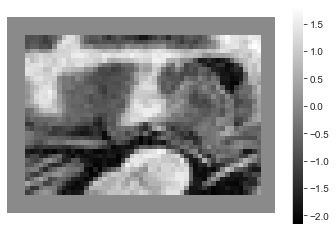

In [394]:
i = 10
print(f'Plotting layer Layer {i} of image')
plt.imshow(images[3, 0, :, :, 15], cmap = 'gray')
plt.axis('off')
plt.colorbar()
plt.show

### import model for testing

In [598]:
print(torch.device('cpu'))

cpu


In [599]:
model = UNet()
model.load_state_dict(torch.load('/Users/zhujiayuan/Desktop/hippocampus_nn/20230221224007/UNet_hippocampus_best.pt',map_location='cpu'))


model.eval()

UNet(
  (initial): Sequential(
    (0): Conv3d(1, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (4): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (down1): Sequential(
    (0): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1): Sequential(
      (0): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (1): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv3d(128, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (4): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
    )
  )
  (down2): Sequential(
    (0): MaxPool3d(kernel_size=2

In [600]:
device = 'cpu'

In [638]:
dataiter = iter(testloader)
images, masks = next(dataiter)
output = model(images.to(device))

images.shape

torch.Size([25, 1, 43, 59, 47])

In [680]:
transform = tio.CropOrPad((50,60,50))
a = transform(images[0])

a = torch.unsqueeze(a.float(),dim=0)
a.shape

torch.Size([1, 1, 50, 60, 50])

In [681]:
output_test_size = model(a)

(array([145226.,      0.,      0.,      0.,      0.,   2181.,      0.,
             0.,      0.,   2593.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

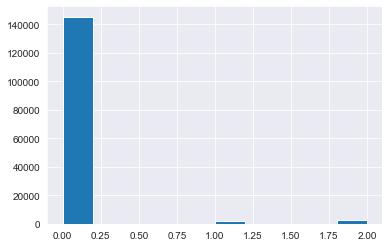

In [682]:
output_test_size = torch.argmax(output_test_size,dim=1)

plt.hist(output_test_size.numpy().flatten())

In [685]:
#torch(output_test_size

torch.Size([1, 50, 60, 50])

In [687]:
ni_img = nib.Nifti1Image(np.squeeze(output_test_size.numpy()), image_obj.affine, image_obj.header)
nib.save(ni_img, "test2.nii.gz")

(array([70416.,     0.,     0.,     0.,     0.,  2570.,     0.,     0.,
            0.,  2938.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

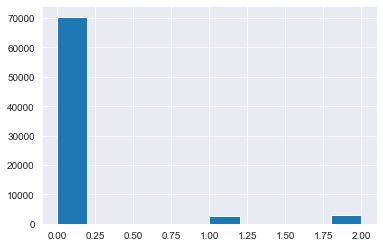

In [667]:
image_test_size = glob.glob('/Users/zhujiayuan/Downloads/Task04_Hippocampus/imagesTr' + "/*.nii.gz")
# a = nib.load(image_test_size[0]).get_fdata()
# a = torch.from_numpy(a)

# a = torch.unsqueeze(a.float(),dim=0)
# a = torch.unsqueeze(a.float(),dim=0)
# a.shape

image = tio.ScalarImage(image_test_size[0])
        
# normalization
transform = tio.transforms.ZNormalization()
a = transform(image).data
a = torch.unsqueeze(a.float(),dim=0)
a.shape

output_test_size = model(a)

output_test_size = torch.argmax(output_test_size,dim=1)

plt.hist(output_test_size.numpy().flatten())

In [604]:
output_label = torch.argmax(output,dim=1)
print(torch.max(output_label))
print(output_label.shape)

tensor(2)
torch.Size([25, 43, 59, 47])


(array([114508.,      0.,      0.,      0.,      0.,   2146.,      0.,
             0.,      0.,   2585.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

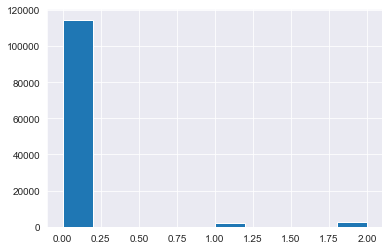

In [605]:
# changed weight (1,5,10)
plt.hist(output_label[0].numpy().flatten())

(array([85677.,     0.,     0.,     0.,     0.,  2076.,     0.,     0.,
            0., 31486.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

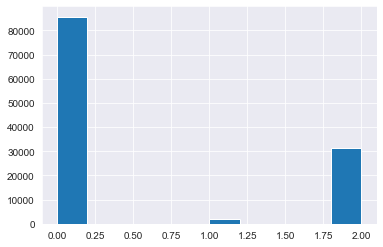

In [569]:
# weight 1,100,100
plt.hist(output_label[0].numpy().flatten())

In [606]:
image_path = '/Users/zhujiayuan/Desktop/hippocampus_nn/Task04_Hippocampus/test/labels/100.nii.gz'
image_obj = nib.load(image_path)

In [607]:
ni_img = nib.Nifti1Image(output_label[0].numpy(), image_obj.affine, image_obj.header)
nib.save(ni_img, "test1.nii.gz")

In [711]:
def read_file_to_list(file_name):
    list_name = []
    with open(file_name) as file:
        for line in file:
            list_name.append(line.rstrip())
    return list_name

label_list = read_file_to_list('/Users/zhujiayuan/Desktop/hippocampus_nn/Task04_Hippocampus/test/labels_list.txt') 
label_list

['Task04_Hippocampus/test/labels/100.nii.gz',
 'Task04_Hippocampus/test/labels/134.nii.gz',
 'Task04_Hippocampus/test/labels/135.nii.gz',
 'Task04_Hippocampus/test/labels/149.nii.gz',
 'Task04_Hippocampus/test/labels/165.nii.gz',
 'Task04_Hippocampus/test/labels/17.nii.gz',
 'Task04_Hippocampus/test/labels/175.nii.gz',
 'Task04_Hippocampus/test/labels/201.nii.gz',
 'Task04_Hippocampus/test/labels/207.nii.gz',
 'Task04_Hippocampus/test/labels/211.nii.gz',
 'Task04_Hippocampus/test/labels/213.nii.gz',
 'Task04_Hippocampus/test/labels/214.nii.gz',
 'Task04_Hippocampus/test/labels/217.nii.gz',
 'Task04_Hippocampus/test/labels/229.nii.gz',
 'Task04_Hippocampus/test/labels/23.nii.gz',
 'Task04_Hippocampus/test/labels/244.nii.gz',
 'Task04_Hippocampus/test/labels/253.nii.gz',
 'Task04_Hippocampus/test/labels/255.nii.gz',
 'Task04_Hippocampus/test/labels/256.nii.gz',
 'Task04_Hippocampus/test/labels/30.nii.gz',
 'Task04_Hippocampus/test/labels/50.nii.gz',
 'Task04_Hippocampus/test/labels/74.ni

In [782]:
basic_root = '/Users/zhujiayuan/Desktop/hippocampus_nn/'
root = '20230222030004'
root_result = os.path.join(basic_root, 'result', root)
model_root = os.path.join(root_result, 'UNet_hippocampus_best.pt')
    
model = UNet()
model.load_state_dict(torch.load(model_root, map_location='cpu'))
model.eval()

UNet(
  (initial): Sequential(
    (0): Conv3d(1, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (4): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (down1): Sequential(
    (0): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1): Sequential(
      (0): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (1): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv3d(128, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (4): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
    )
  )
  (down2): Sequential(
    (0): MaxPool3d(kernel_size=2

In [800]:
image_path = '/Users/zhujiayuan/Desktop/hippocampus_nn/HCP_sample/100206/MNINonLinear/T1w.nii.gz'

image = tio.ScalarImage(image_path)
        
# normalization
transform = tio.transforms.ZNormalization()
image = transform(image)

In [801]:
image = image.data
image.shape

torch.Size([1, 260, 311, 260])

In [802]:


image = torch.unsqueeze(image.float(),dim=0)

print(image.shape)

torch.Size([1, 1, 260, 311, 260])


In [ ]:
output = model(image.to(device))
output_label = torch.argmax(output,dim=1)

In [ ]:
plt.hist(output_label.numpy().flatten())

In [766]:
basic_root = '/Users/zhujiayuan/Desktop/hippocampus_nn/'
for root in ['20230222005916', '20230222022206', '20230222030004']:
    root_result = os.path.join(basic_root, 'result', root)
    model_root = os.path.join(root_result, 'UNet_hippocampus_best.pt')
    model = UNet()
    model.load_state_dict(torch.load(model_root, map_location='cpu'))
    model.eval()
    
    dataiter = iter(testloader)
    images, masks = next(dataiter)
    output = model(images.to(device))
    output_label = torch.argmax(output,dim=1)
    
    label_list = read_file_to_list('/Users/zhujiayuan/Desktop/hippocampus_nn/Task04_Hippocampus/test/labels_list.txt') 

    #plt.hist(output_test_size.numpy().flatten())
    
    for i in range(len(label_list)):
        label_path = label_list[i]
        label_path = os.path.join(basic_root, label_path)
        label_obj = nib.load(label_path)
        ni_img = nib.Nifti1Image(output_label[i].numpy(), label_obj.affine, label_obj.header)
        nib.save(ni_img, os.path.join(root_result, label_path[72:]))


    
